---
---

# **1 - Ames Data Set**

Let's explore our Ames Housing Data Set

Ames Data Set: http://jse.amstat.org/v19n3/decock.pdf

Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Feature Description
with open('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Regression/Ames_Housing_Price_Prediction/Ames_Housing_Feature_Description.txt', 'r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Regression/Ames_Housing_Price_Prediction/Ames_Housing_Data.csv')

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df_copy = df.copy()

---
---

# **2 - Feature Engineering and Exploratory Data Analysis**

## **A. Features Correlation**

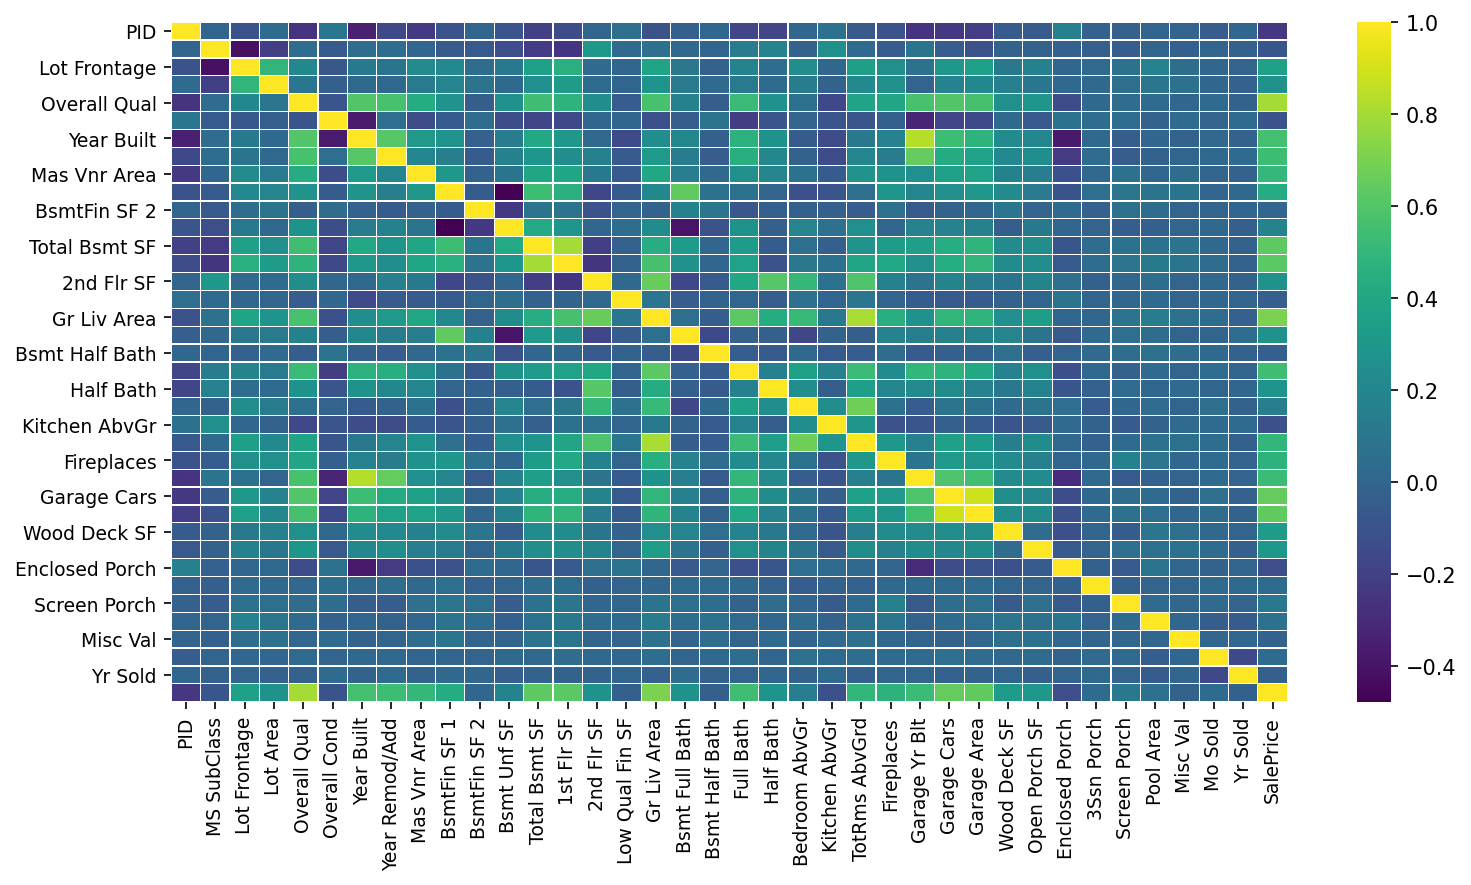

In [6]:
# Plot Pearson Correlation on Heatmap
plt.figure(figsize=(12,6), dpi=150)
sns.heatmap(df_copy.corr(), cmap='viridis', lw=0.1)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [7]:
# Return pearson correlation in 'SalePrice'
df_copy.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

---

## **B. Dealing with Outliers**

**Note:**

* **left-skewed -> Mean < Median**

* **right-skewed -> Mean > Median**

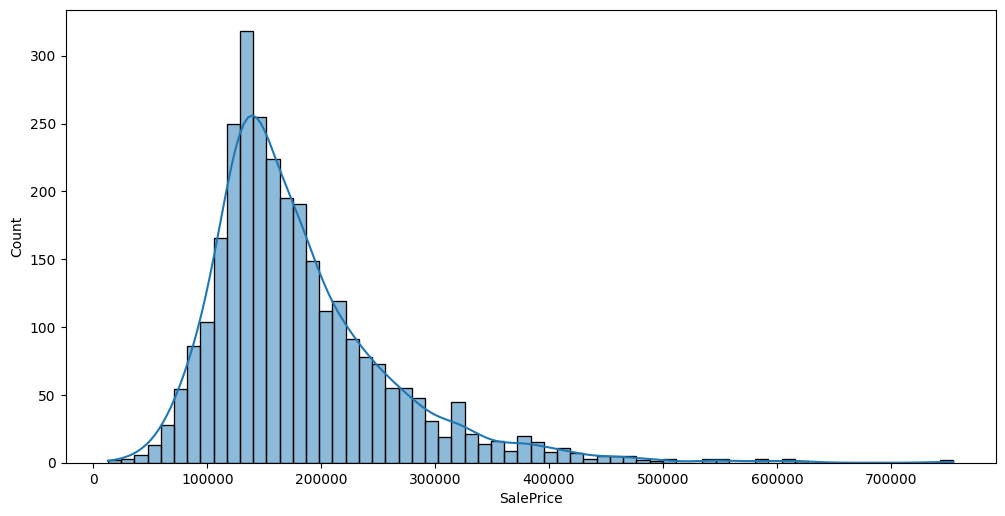

In [8]:
# Plot the distribution of 'SalePrice'
plt.figure(figsize=(12,6), dpi=100)
sns.histplot(df_copy["SalePrice"], kde=True)
plt.show()

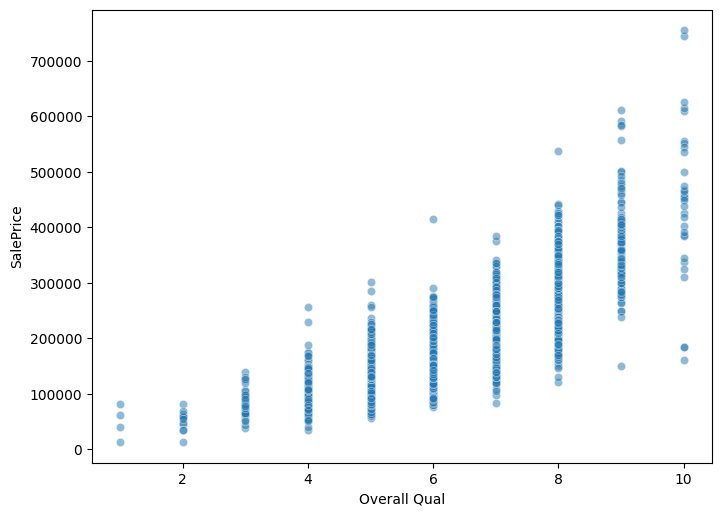

In [9]:
# Plot 'Overall Qual' vs 'SalePrice' (Highest Relation)
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

Based on image above, the `higher` the `overall quality`, the `price` likely to be `higher`. But there is an `outliers` in the data `where` with `high` quality, the `price` is `not like` the other `('Overall Qual' > 8 and 'SalePrice' < 200000)`, let search another relationship that more clear.

In [10]:
# Return the outlier data based on 'Overall Qual' and SalesPrice (Look image above)
df_copy[(df_copy['Overall Qual']>8) & (df_copy['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,...,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [11]:
df_copy[(df_copy['Overall Qual']>8) & (df_copy['SalePrice']<200000)].index

Int64Index([1182, 1498, 2180, 2181], dtype='int64')

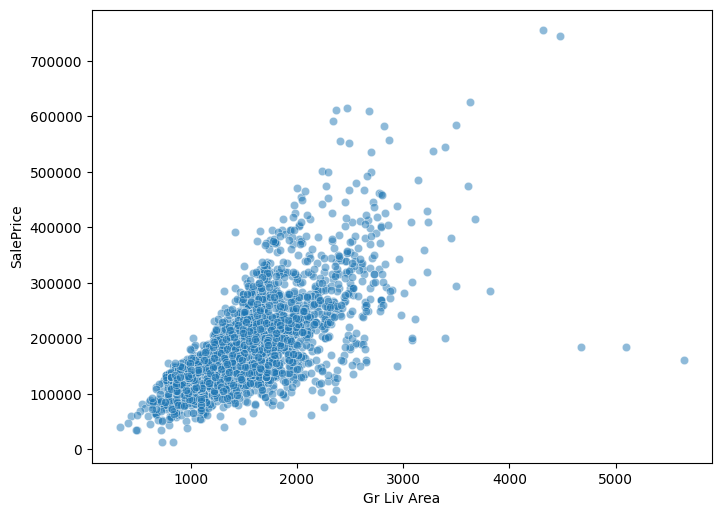

In [12]:
# Plot 'Gr Liv Area' vs 'SalePrice' (2nd Highest Relation)
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

Based on image above, the `wider` the `Gr Living Area`, the `price` tends to be `higher`. But there is also an oulier in the data where `'Gr Liv Area' > 4000 and 'SalePrice' < 200000`. Because it is `double` the 'Gr Liv Area' but the 'SalePrice' is `not` much `differs` (not following the trends line)

In [13]:
# Check the outliers data
df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

There is `same rows` from `'Overall Qual'` too (1498, 2180, 2181).

So lets `drop` the row

In [15]:
ind_drop = df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)].index

In [16]:
# Drop the outliers row 
df_copy = df_copy.drop(ind_drop,axis=0)

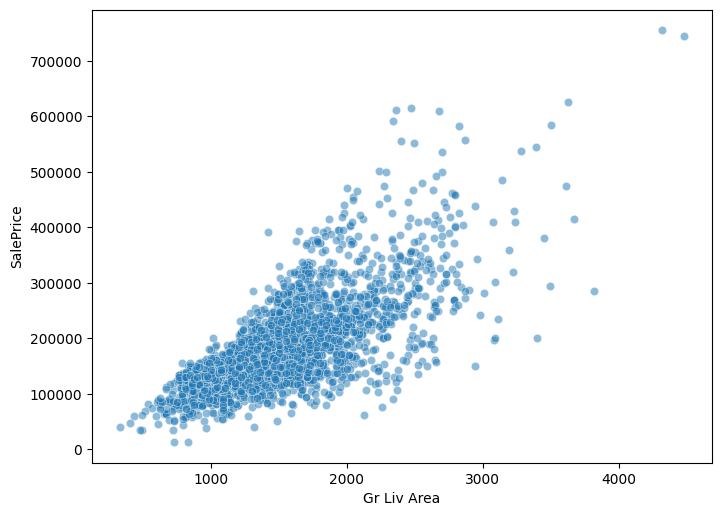

In [17]:
# Plot 'Gr Liv Area' vs 'SalePrice' without outliers
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

The outliers is dropped

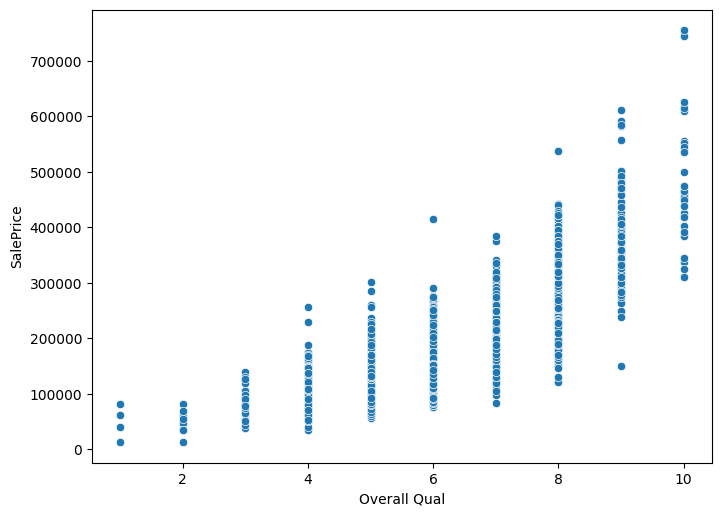

In [18]:
# Plot 'Overall Quall' vs 'SalePrice' without outliers
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df_copy)
plt.show()

The outliers is dropped

---

## **C. Dealing with Missing Data**


In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

---

### **a. Removing the PID**

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [20]:
df_copy = df_copy.drop('PID', axis=1)

In [21]:
len(df_copy.columns)

80

---

### **b. Observing NaN Features**

In [22]:
df_copy.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [23]:
# Create function to calculate missing data percentage
def percent_missing(df):
    # Calculate the percentage
    percent_nan = 100 * (df.isnull().sum() / len(df))

    # Pick Data that have columns with missing data
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()

    return percent_nan

In [24]:
# percentage = 100 * (df_copy.isnull().sum() / len(df_copy))
# percent_nan = percentage[percentage > 0 ].sort_values()
# OR
percent_nan = percent_missing(df_copy)
percent_nan.tail()

Fireplace Qu    48.582166
Fence           80.457807
Alley           93.235395
Misc Feature    96.412709
Pool QC         99.590024
dtype: float64

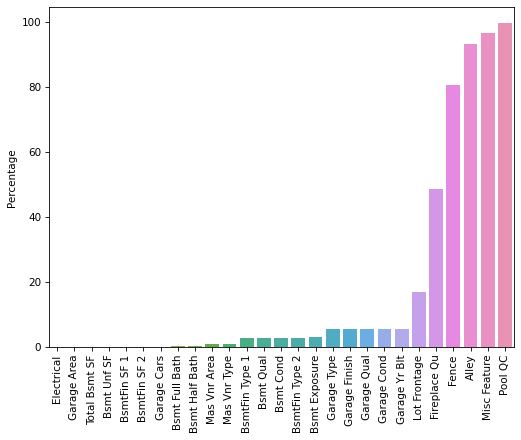

In [25]:
# Plot percentages of missing data in features
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

---

### **c. Working based on Rows Missing Data**

## Filling in Data or Dropping Data?

Let's explore how to `choose` to `remove` or `fill` in `missing data for rows` that are missing some data. Let's choose some `threshold` where we `decide` it is ok to drop a row if its missing some data (instead of attempting to `fill` in that missing data point). We will `choose` 1% as our threshold. This means if `less` than 1% of the `rows` are `missing` this feature, we will consider just `dropping` that `row`, `instead` of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you `don't want` to `drop rows with a very high threshold` like 50% , you should also explore correlation to the dataset, maybe it makes sense to `drop the feature` instead.

Based on the `text description` of the features, you will see that most of this `missing data` is actually `NaN` on `purpose` as a `placeholder` for 0 or "none".

#### *Filling in Data : Basement Columns*

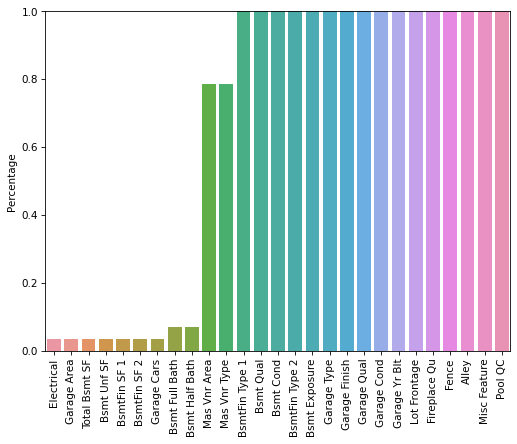

In [26]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')

# Set 1% Threshold
plt.ylim(0,1)
plt.show()

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. In reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [27]:
# Considering either drop rows or fill the missing data
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

**The numerical basement columns:**

In [28]:
# Fill with number, because NaN in this column is mean 0 (this house not has basement)
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_copy[bsmt_num_cols] = df_copy[bsmt_num_cols].fillna(0)

**The string basement columns:**

In [29]:
# Fill with number, because NaN in this column is mean None (this house not has basement)
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df_copy[bsmt_str_cols] = df_copy[bsmt_str_cols].fillna('None')

In [30]:
# Get the newly percentage of missing value
percent_nan = percent_missing(df_copy)

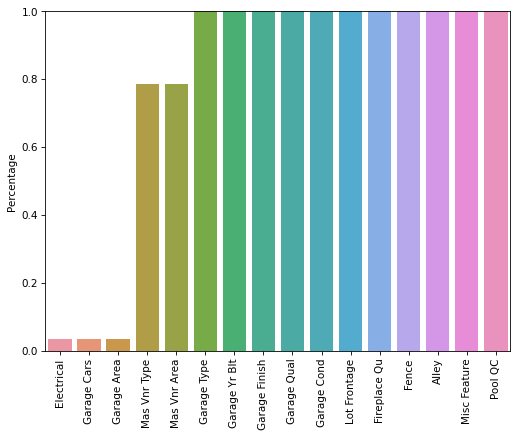

In [31]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.show()

---

#### *Dropping Rows*

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [32]:
# Drop row that has NaN value from 'Electrical' and 'Garage Cars'
df_copy = df_copy.dropna(axis=0, subset= ['Electrical', 'Garage Area'])

In [33]:
# Get the newly percentage of missing value
percent_nan = percent_missing(df_copy)

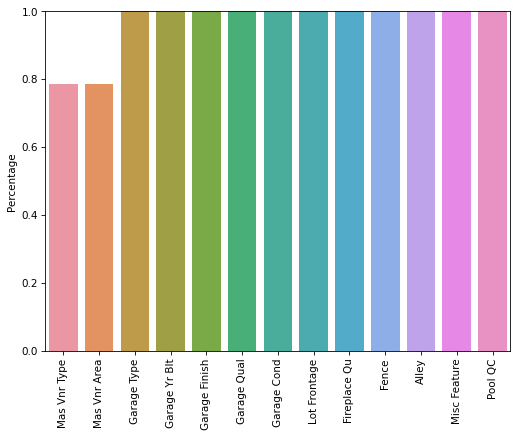

In [34]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.show()

---

#### *Filling in Mas Vnr Feature* 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

    MasVnrType: Masonry veneer type

          BrkCmn	 Brick Common
          BrkFace	Brick Face
          CBlock	 Cinder Block
          None	   None
          Stone	  Stone
      
    MasVnrArea: Masonry veneer area in square feet

In [35]:
df_copy["Mas Vnr Type"] = df_copy["Mas Vnr Type"].fillna("None")
df_copy["Mas Vnr Area"] = df_copy["Mas Vnr Area"].fillna(0)

In [36]:
percent_nan = percent_missing(df_copy)

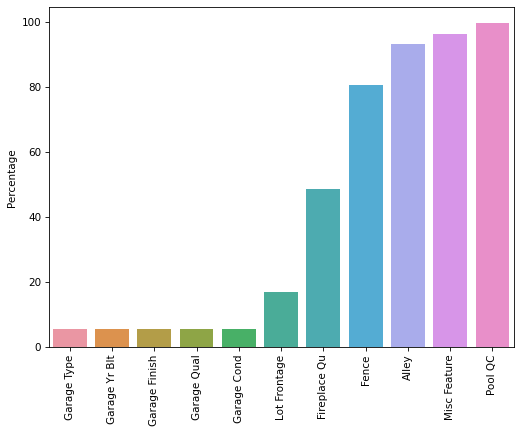

In [37]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

---

### **d. Working based on Columns Missing Data**

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

#### **- Check the Missing Data > 80%**

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

    GarageType: Garage location
        
          2Types	 More than one type of garage
          Attchd	 Attached to home
          Basment	Basement Garage
          BuiltIn	Built-In (Garage part of house - typically has room above garage)
          CarPort	Car Port
          Detchd	 Detached from home
          NA	     No Garage
        
    GarageFinish: Interior finish of the garage

          Fin	Finished
          RFn	Rough Finished	
          Unf	Unfinished
          NA	 No Garage

    GarageQual: Garage quality

          Ex	Excellent
          Gd	Good
          TA	Typical/Average
          Fa	Fair
          Po	Poor
          NA	No Garage
        
    GarageCond: Garage condition

          Ex	Excellent
          Gd	Good
          TA	Typical/Average
          Fa	Fair
          Po	Poor
          NA	No Garage

    GarageYrBlt: Year garage was built

----

##### *Filling in Data*

In [38]:
df_copy[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [39]:
# Fill the str data
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df_copy[gar_str_cols] = df_copy[gar_str_cols].fillna('None')

In [40]:
# Fill the numeric data
df_copy['Garage Yr Blt'] = df_copy['Garage Yr Blt'].fillna(0)

In [41]:
percent_nan = percent_missing(df_copy)

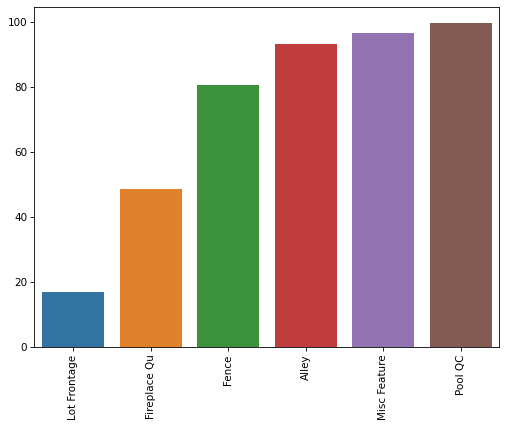

In [42]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

---

##### *Dropping Feature Columns*

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 80% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [43]:
# Drop the Feature Column
df_copy = df_copy.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1)

In [44]:
percent_nan = percent_missing(df_copy)

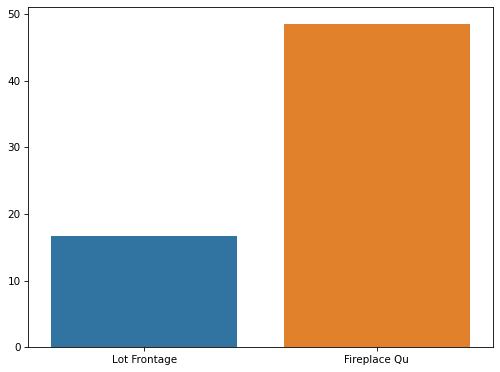

In [45]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.show()

Now check the remaining features carefully before taking decision because the NaN value is between 1%-80%

---

#### **- Check the missing Data between 1% and 80%**

    FireplaceQu: Fireplace quality

          Ex	Excellent - Exceptional Masonry Fireplace
          Gd	Good - Masonry Fireplace in main level
          TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
          Fa	Fair - Prefabricated Fireplace in basement
          Po	Poor - Ben Franklin Stove
          NA	No Fireplace

It is a Categorical Data so:

In [46]:
df_copy['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

Because 'Fireplace Qu' is categorical, then the NaN value is 'None'

In [47]:
df_copy['Fireplace Qu'] = df_copy['Fireplace Qu'].fillna("None")

In [48]:
percent_nan = percent_missing(df_copy)

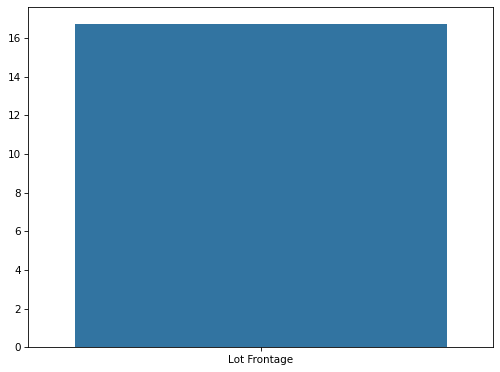

In [49]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.show()

Now just Lot Frontage feature (Numerical & Continous)

---

### **e. [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data**

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

    Neighborhood: Physical locations within Ames city limits

    LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [50]:
df_copy['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

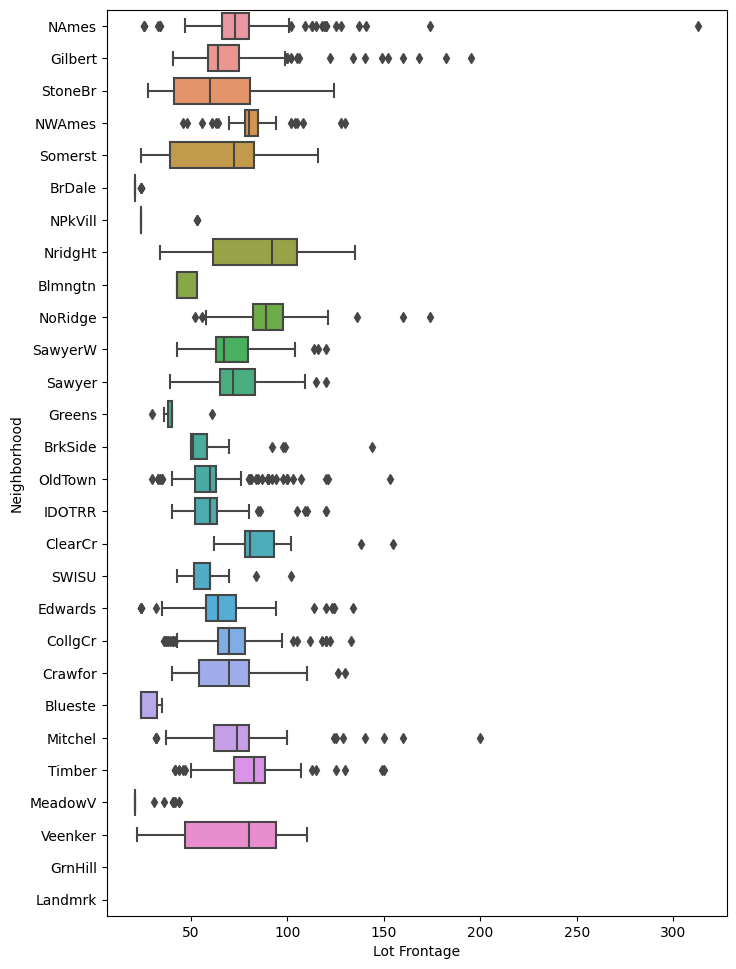

In [51]:
plt.figure(figsize=(8,12), dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df_copy, orient='h')
plt.show()

**Note:**

* **left-skewed -> Mean < Median**

* **right-skewed -> Mean > Median**

In [52]:
df_copy[['Lot Frontage', 'Neighborhood']].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Lot Frontage,2435,NaN,NaN,NaN,69.0817,22.7932,21,58,68,80,313
Neighborhood,2925,28,NAmes,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The mean of 'Lot Frontage' of its 'Neighborhood' will be the fill value of NaN (because the mean and median is almost the same)

---

#### *Impute Missing Data based on other Features*

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [53]:
# The Mean of Neighborhood group
df_copy.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [54]:
# Value before update
df_copy[['Lot Frontage', 'Neighborhood']].iloc[21:26]

,Lot Frontage,Neighborhood
21,85.0,NWAmes
22,NaN,Somerst
23,NaN,NAmes
24,NaN,NAmes
25,65.0,NAmes


In [55]:
"""
.transform():
    Call func on self, producing a DataFrame with transformed values. 
    Return DataFrame with same axis length as self.
    Doesnt return aggregated result.
"""

# Fill the NaN value of 'Lot Frontage' by the Mean of its 'Neighborhood' Group
df_copy['Lot Frontage'] = df_copy.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

# It is will return its original length with updated value based on function
df_copy['Lot Frontage']

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [56]:
# value after update
df_copy[['Lot Frontage', 'Neighborhood']].iloc[21:26]

,Lot Frontage,Neighborhood
21,85.000000,NWAmes
22,64.549383,Somerst
23,75.210667,NAmes
24,75.210667,NAmes
25,65.000000,NAmes


In [57]:
percent_nan = percent_missing(df_copy)

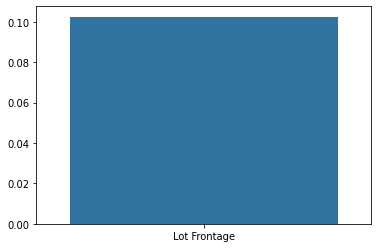

In [58]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.show()

**The remaining NaN value will be fill with zero**

In [59]:
df_copy['Lot Frontage'] = df_copy['Lot Frontage'].fillna(0)

In [60]:
percent_nan = percent_missing(df_copy)
percent_nan

Series([], dtype: float64)

We no longer have any missing data in our entire data set! 

Keep in mind, we should eventually turn all these transformations into an easy to use function.

In [61]:
df_clean = df_copy.copy()

---

## **D - Dealing with Categorical Data**

Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

In [62]:
df_clean.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [63]:
df_clean.shape

(2925, 76)

---

### **Creating Dummy Variables from Object Columns**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model. For example, the encoding MSSubClass is essentially just a number code per class:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES". Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. Make sure you fully understand your data set to examine what needs to be converted/changed.

In [64]:
# Convert to String
df_clean['MS SubClass'] = df_clean['MS SubClass'].apply(str)

In [65]:
# Select all data that has datatypes object/str to create dummy variable (One Hot Encoding)
df_objs = df_clean.select_dtypes(include='object')

In [66]:
# Select all data that doesnt has datatypes object/str
df_nums = df_clean.select_dtypes(exclude='object')

In [67]:
#df_objs.head()

---

#### *a. Converting and Combining DF*

In [68]:
#b = pd.get_dummies(df_objs, drop_first=True).head(2)
#b[['MS SubClass_20']]

In [69]:
#b

In [70]:
#a = pd.get_dummies(df_objs, drop_first=False).head(2)
#a[['MS SubClass_120']]

In [71]:
#a

In [72]:
# One Hot Encoding for categorical data and drop each of the categorical type
df_objs = pd.get_dummies(df_objs, drop_first=False)

In [73]:
# Combine back the DataFrame by columns
final_df = pd.concat([df_nums, df_objs], axis=1)

---

#### *b. Final DataFrame*

Keep in mind, we don't know if 274 columns is very useful. More columns doesn't necessarily lead to better results. In fact, we may want to further remove columns (or later on use a model with regularization to choose important columns for us). What we have done here has greatly expanded the ratio of rows to columns, which may actually lead to worse performance (however you don't know until you've actually compared multiple models/approaches).

In [74]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,...,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_Fin,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [75]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 314, dtype: float64

    OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

Most likely a human realtor rated this "Overall Qual" column, which means it highly likely takes into account many of the other features. It also means that any future house we intend to predict a price for will need this "Overall Qual" feature, which implies that every new house on the market that will be priced with our ML model will still `require` a human person

----
---

# **3 - Elastic Net**

## **A. Setup**

In [76]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,...,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_Fin,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 314 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(278)
memory usage: 1.7 MB


**The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [78]:
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

---

### **a. Train | Test Split**
**Use scikit-learn to split up X and y into a training set and test set. Since we will be using a Grid Search strategy, set your test proportion to 10%.**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Because we using Cross Validation in Grid Search, so the test data will be a hold-out data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [81]:
X_train.shape

(2632, 313)

In [82]:
X_test.shape

(293, 313)

### **b. Scaling the Data**
**The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

**Rescale data to have mean (u) of 0 and standard deviation of 1**

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
# Fit and Transform training data
# (fit is to calculate statistical information)
scaled_X_train = scaler.fit_transform(X_train)

In [86]:
# Transform test data
scaled_X_test = scaler.transform(X_test)

## **B. Create Estimator/Model**
**We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn**

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
base_elactic_model = ElasticNet(max_iter=200000) #Increase the max_iter in case you see a warning

---

### **a. GridSearch for Best Hyper-Parameters**

**The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices**

In [89]:
# Note that a good choice of list of values for l1_ratio is often to put more values close to 1
# (i.e. Lasso) and less close to 0 (i.e. Ridge)
# l1_ratio is lambda and alpha is ratio between L1 and L2
param_grid = {'alpha':[0.1,1,5,10,50,100,150],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

**Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. [In case you are curious about the warnings you may recieve for certain parameter combinations](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

**Scoring Paramater:**

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
# Grid Search for best parameter using Cross Validation
grid_elastic_model = GridSearchCV(estimator=base_elactic_model,
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5, # Cross Validation value
                                  verbose=1 # Verbose: to print output message of the fit
                                  )

---

### **b. Fit/Train the Model**

In [92]:
grid_elastic_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 10.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=200000,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100, 150],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

**Display the best estimator/model**

In [93]:
grid_elastic_model.best_estimator_

ElasticNet(alpha=150, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=200000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Display the best combination of parameters for your model**

In [94]:
grid_elastic_model.best_params_

{'alpha': 150, 'l1_ratio': 1}

The model tends to Lasso Regression (l1_ratio = 1), so there will be feature that has no impact to the model


---

### **c. Coefficients**

**Report back the model's coefficients.**

In [95]:
# Return coefficients that not zero
column = X.columns
coef_val = pd.Series(grid_elastic_model.best_estimator_.coef_, index=column)
coef_val = coef_val[coef_val.values != 0].sort_values()
coef_val

Bedroom AbvGr             -3146.893580
Mas Vnr Type_BrkFace      -2941.513522
Kitchen AbvGr             -1885.962901
MS SubClass_120           -1790.204735
Sale Condition_Abnorml    -1734.446887
                              ...     
Total Bsmt SF              8459.852682
BsmtFin SF 1               9103.609612
Overall Qual               9847.079527
Year Built                10181.309349
Gr Liv Area               28360.690146
Length: 211, dtype: float64

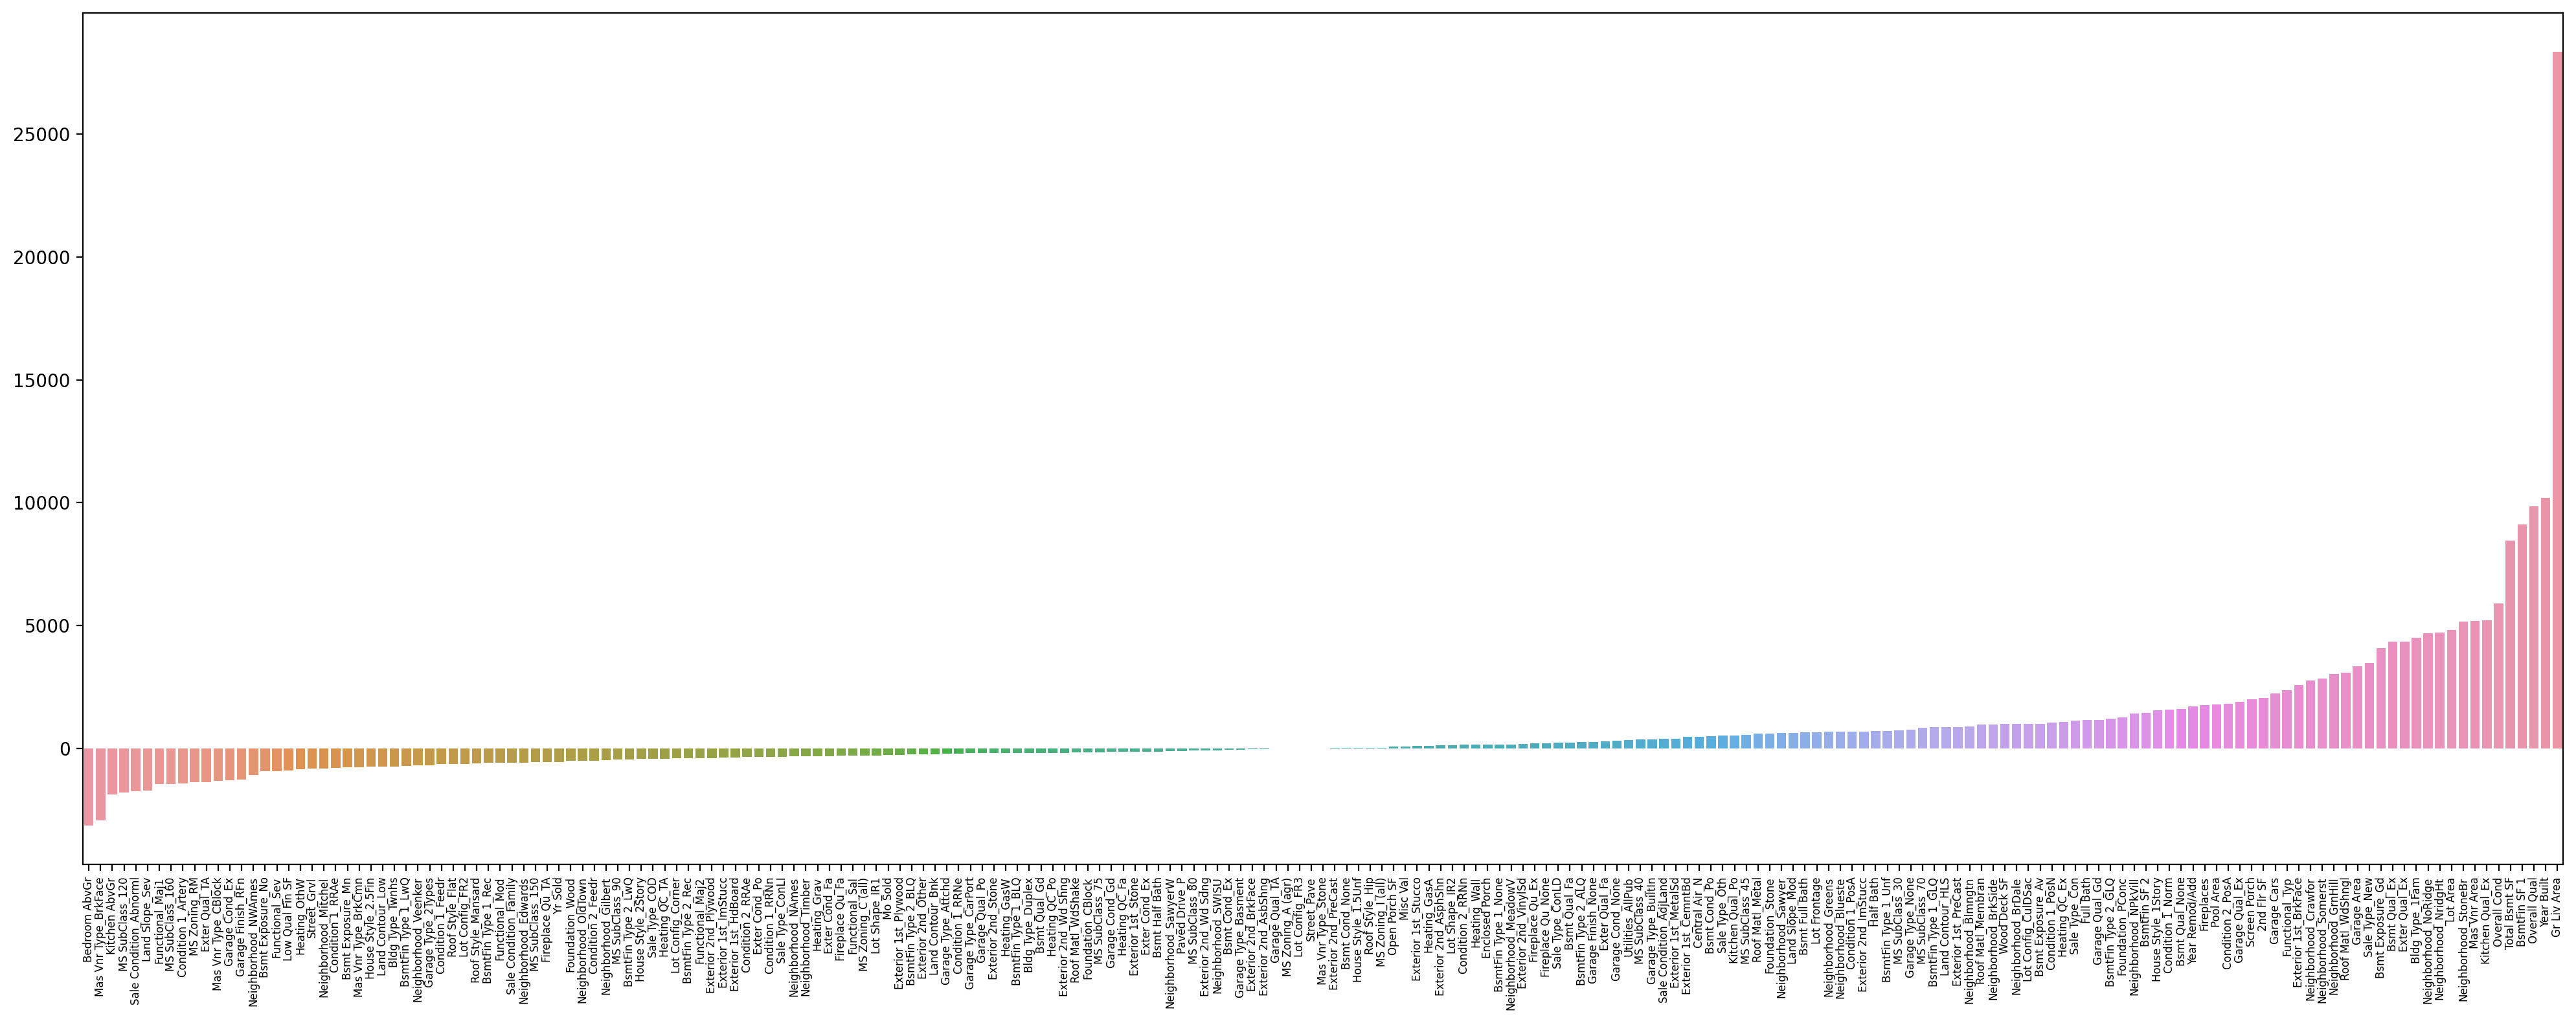

In [96]:
plt.figure(figsize=(20,8), dpi=200)
sns.barplot(x=coef_val.index, y=coef_val.values)
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

**Zero Coefficients Features:**

In [97]:
# Return Beta Coefficients that has no impact on model
zero_coef = pd.Series(grid_elastic_model.best_estimator_.coef_)
zero_coef = zero_coef[zero_coef.values == 0]
zero_coef

9     -0.0
11     0.0
21    -0.0
23    -0.0
29    -0.0
      ... 
305   -0.0
306   -0.0
309    0.0
311    0.0
312    0.0
Length: 102, dtype: float64

In [98]:
# Feature that has zero coeff
zero_coef_column = zero_coef.index
final_df.columns[zero_coef_column]

Index(['Bsmt Unf SF', '1st Flr SF', 'TotRms AbvGrd', 'Garage Yr Blt',
       '3Ssn Porch', 'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190',
       'MS SubClass_45', 'MS SubClass_50',
       ...
       'Garage Cond_Po', 'Garage Cond_TA', 'Paved Drive_P', 'Sale Type_COD',
       'Sale Type_ConLI', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Condition_AdjLand', 'Sale Condition_Family',
       'Sale Condition_Normal'],
      dtype='object', length=102)

In [99]:
# Feature that has zero coeff
#final_df.columns[[9,11,21,23,29,37,44,46,47,51,52,53,58,67,75,81,82,107,109,111,117,122,123,124,125,128,131,135,136,138,147,148,149,151,153,154,155,157,162,164,174,176,179,184,187,188,189,191,195,199,205,207,208,218,219,220,221,226,229,234,236,238,244,246,247,249,254,256,258,263,266,267,270]]

We can remove the feature that has zero coef, if we want.

---

## **C. Performance Evaluation using Hold-Out Data**
**Evaluate your model's performance on the unseen 10% scaled test set. In the solutions notebook we achieved an MAE of $\$$14149 and a RMSE of $\$$20532**

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
# Predict on the unseen data
y_test_pred = grid_elastic_model.predict(scaled_X_test)

In [102]:
MAE = mean_absolute_error(y_test, y_test_pred)
MAE = np.round(MAE, 0)
MAE

14094.0

In [103]:
# Standard Deviation of Sale Price
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
RMSE = np.round(RMSE, 0)
RMSE

20442.0

**Compare error with sale price mean**

In [104]:
np.round(final_df['SalePrice'].mean(), 0)

180816.0

The l1_ratio no needs to adjust anymore because it is tend to lasso regression. But we can adjust the alpha value in Grid Search to get lower the MAE and RMSE

---
---

# **4 - Finalize Model**

## **A. Re-Train/Fit Model on All Data**

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

**Using best estimators from Grid Search, we Re-Train all data:**

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
scaler = StandardScaler()
elastic_net = ElasticNet(alpha=150, copy_X=True, fit_intercept=True, l1_ratio=1,
                         max_iter=200000, normalize=False, positive=False, precompute=False,
                         random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
operations = [('scaler',scaler),('elastic_net',elastic_net)]

In [107]:
final_model_pipe = Pipeline(operations)

In [108]:
final_model_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elastic_net',
                 ElasticNet(alpha=150, copy_X=True, fit_intercept=True,
                            l1_ratio=1, max_iter=200000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

---

## **B. Final Model Prediction**

In [109]:
X.iloc[0]

Lot Frontage                141.0
Lot Area                  31770.0
Overall Qual                  6.0
Overall Cond                  5.0
Year Built                 1960.0
                           ...   
Sale Condition_AdjLand        0.0
Sale Condition_Alloca         0.0
Sale Condition_Family         0.0
Sale Condition_Normal         1.0
Sale Condition_Partial        0.0
Name: 0, Length: 313, dtype: float64

In [110]:
y.iloc[0]

215000

In [111]:
np.round(final_model_pipe.predict([X.iloc[0].values]),0)

array([224173.])

In [112]:
y_pred = final_model_pipe.predict(X)

In [113]:
RMSE = np.sqrt(mean_squared_error(y, y_pred))
RMSE = np.round(RMSE, 0)
RMSE

19687.0

---

## **B. Saving the Model**

In [114]:
from joblib import dump

In [115]:
dump(final_model_pipe, '/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Regression/Ames_Housing_Price_Prediction/ames_housing_price_elastic_net_pipeline.joblib') 

['/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Regression/Ames_Housing_Price_Prediction/ames_housing_price_elastic_net_pipeline.joblib']

---
---